In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def sum_square_error(real, predicted):
    return np.square(real - predicted).sum()

## Fitting a constant function $y=a$ to data

First let's draw some random data. 

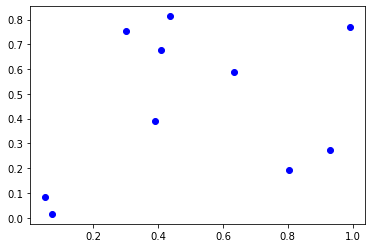

In [3]:
x = np.random.rand(10)
y = np.random.rand(10)
plt.scatter(x, y, color="blue")
plt.show()

What should be the constant best matching the different samples of $y$? 

In [4]:
model = lambda x: a*x**0

a = 0.5

estimate_y = np.array([model(x) for x in x])
print(sum_square_error(y, estimate_y))

0.8393067063194967


### Grid search

Find the optimal constant $a$ resulting in the least sum square error. 
The grid below consists of 20 equally spaced samples of $a$.  

(20,)


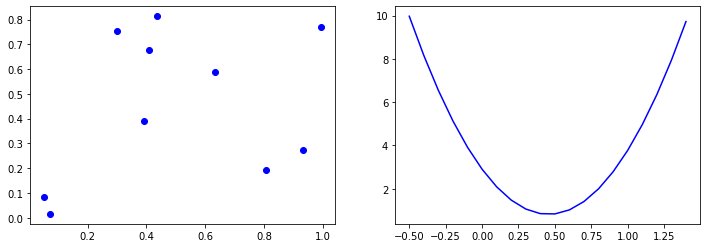

In [5]:
a = np.arange(-0.5, 1.5, 0.1)
print(a.shape)
e = [sum_square_error(y, ai*x**0) for ai in a]

fig, (ax_data,ax_err) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12, 4))
ax_data.scatter(x, y, color="blue")
ax_err.plot(a, e, color="blue")
plt.show()

How to find the optimal $a$ up to an error of $e<10^-7$? 

## Fitting a linear function $y=ax+b$ to data

First we create some noisy samples.  

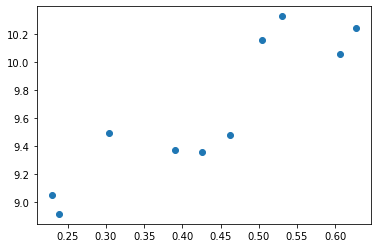

In [6]:
x = np.random.rand(10) #select some points
y = 3*x + 8 + np.random.rand(10) #let real data be linear at x with some noise
plt.scatter(x,y)
plt.show()

### Grid search

Find the optimal $a$ and $b$. Grid below consists of $35\times 35$ equally spaced pairs of $a$ and $b$.  

In [7]:
a = np.arange(-0.0, 6.0, 0.1)
b = np.arange(5.0, 11, 0.1)
e = np.array([[sum_square_error(y, 
                                ai*x+bi   #a linear equation we would like to fit
                               ) 
               for ai in a] 
              for bi in b])
print(e.shape)

(60, 60)


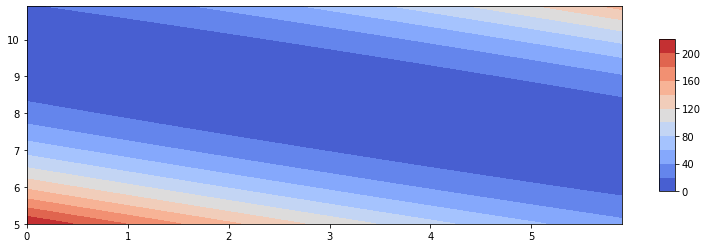

In [8]:
from matplotlib import cm

fig = plt.figure(figsize=plt.figaspect(0.3))
A, B = np.meshgrid(a, b)
ax = fig.add_subplot(1, 1, 1)
surf = ax.contourf(A, B, e, 10, cmap=cm.coolwarm, origin="lower")
fig.colorbar(surf, shrink=0.7, aspect=10)
plt.show()

### Gradient descent to optimize $a$ and $b$

Which derivatives need to be computed? 

### $\frac{\partial e}{\partial a}$   $\frac{\partial e}{\partial b}$

not to be confused with 

### $\frac{dy}{dx}$

# Multi-dimensional linear least squares

## Multi-dimensional polinomial

### 2D input, 1D output 
We already saw that above

### 1D input, 2D output

In [9]:
import torch

k=2
d=2
n=1
N=8

In [10]:
x = np.array((range(1,N+1)))
print(x)

x = np.array([1,1])
F = np.array([
    [lambda x:  x**2,lambda x: x   ,lambda x:   x**0],
    [lambda x: -x**2,lambda x: 10*x,lambda x: 3*x**0],
]) 
print(F[0])
rmap =  np.vectorize(lambda f: f(x))
print(rmap(F))


[1 2 3 4 5 6 7 8]
[<function <lambda> at 0x0000021C5A6669D0>
 <function <lambda> at 0x0000021C5A666940>
 <function <lambda> at 0x0000021C5A6668B0>]


ValueError: setting an array element with a sequence.